In [13]:
#krow

In [14]:
from krpy import Corey, Krow, sw_denormalize
import pandas as pd
import numpy as np

In [15]:
cor = Corey(nw=2, no=1.7, krw_end=0.5,kro_end=1.0, pco_end=10,npc=1.5, pd=2.0)
cor

Corey(nw=2.0, no=1.7, ng=2.0, npcwo=2.0, npcog=2.0, krw_end=0.5, kro_end=1.0, krg_end=1.0, pco_end=10.0, pcg_end=0.0, pdwo=0.0, pdog=0.0)

In [16]:
krow = Krow.from_corey(cor, swir=0.15, sor=0.1, n=20)

/Users/scuervo91/Documents/dev/krpy/krpy/kr.py:382: RuntimeWarning: divide by zero encountered in true_divide
  kr_ratio = kro / krw


In [17]:
df = krow.df()
print(df)

                 krw       kro       pcwo       swn    kr_ratio
saturation                                                     
0.150000    0.000000  1.000000  10.000000  0.000000         inf
0.189474    0.001385  0.912183   8.975069  0.052632  658.596373
0.228947    0.005540  0.827717   8.005540  0.105263  149.402977
0.268421    0.012465  0.746660   7.091413  0.157895   59.898719
0.307895    0.022161  0.669074   6.232687  0.210526   30.191955
0.347368    0.034626  0.595027   5.429363  0.263158   17.184374
0.386842    0.049861  0.524593   4.681440  0.315789   10.521006
0.426316    0.067867  0.457854   3.988920  0.368421    6.746338
0.465789    0.088643  0.394899   3.351801  0.421053    4.454959
0.505263    0.112188  0.335830   2.770083  0.473684    2.993443
0.544737    0.138504  0.280757   2.243767  0.526316    2.027068
0.584211    0.167590  0.229812   1.772853  0.578947    1.371272
0.623684    0.199446  0.183141   1.357341  0.631579    0.918249
0.663158    0.234072  0.140921   0.99723

[<AxesSubplot:xlabel='Water Saturation []', ylabel='Kr []'>,
 <AxesSubplot:ylabel='Capillary Pressure [psi]'>]

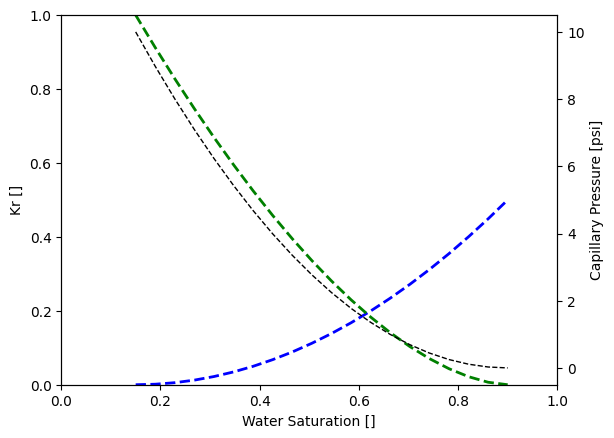

In [18]:
krow.plot(pc=True)

In [19]:
print(krow.to_ecl())

SWOF
0.150000 0.000000 1.000000 10.000000
0.189474 0.001385 0.912183  8.975069
0.228947 0.005540 0.827717  8.005540
0.268421 0.012465 0.746660  7.091413
0.307895 0.022161 0.669074  6.232687
0.347368 0.034626 0.595027  5.429363
0.386842 0.049861 0.524593  4.681440
0.426316 0.067867 0.457854  3.988920
0.465789 0.088643 0.394899  3.351801
0.505263 0.112188 0.335830  2.770083
0.544737 0.138504 0.280757  2.243767
0.584211 0.167590 0.229812  1.772853
0.623684 0.199446 0.183141  1.357341
0.663158 0.234072 0.140921  0.997230
0.702632 0.271468 0.103364  0.692521
0.742105 0.311634 0.070733  0.443213
0.781579 0.354571 0.043374  0.249307
0.821053 0.400277 0.021771  0.110803
0.860526 0.448753 0.006701  0.027701
0.900000 0.500000 0.000000  0.000000/



In [20]:
print(krow.interpolate(0.5))

                 krw       kro      pcwo       swn  kr_ratio
saturation                                                  
0.5         0.109049  0.343706  2.847645  0.466667  3.188312


<AxesSubplot:xlabel='saturation'>

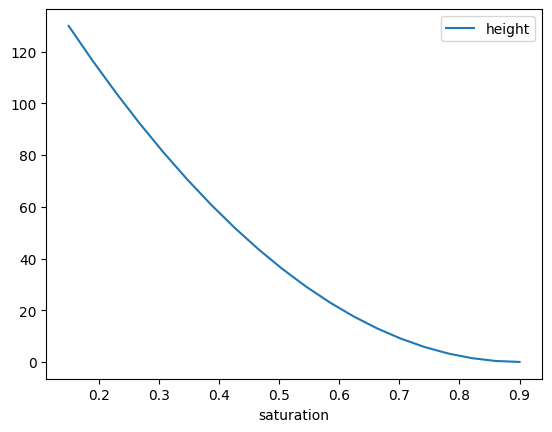

In [21]:
krow.get_height(rhoo=51.2)
krow.df().plot(y='height')

In [22]:
Corey.fit(df.reset_index(),sw='saturation',kro='kro', swir=0.15, sor=0.1)

Corey(nw=1.9999998694430432, no=1.6999081426312752, ng=2.0, npcwo=2.0, npcog=2.0, krw_end=0.4999999899552103, kro_end=0.9999580575417352, krg_end=1.0, pco_end=0.0, pcg_end=0.0, pdwo=0.0, pdog=0.0)

In [23]:
df['krw']

saturation
0.150000    0.000000
0.189474    0.001385
0.228947    0.005540
0.268421    0.012465
0.307895    0.022161
0.347368    0.034626
0.386842    0.049861
0.426316    0.067867
0.465789    0.088643
0.505263    0.112188
0.544737    0.138504
0.584211    0.167590
0.623684    0.199446
0.663158    0.234072
0.702632    0.271468
0.742105    0.311634
0.781579    0.354571
0.821053    0.400277
0.860526    0.448753
0.900000    0.500000
Name: krw, dtype: float64

In [24]:
print(krow.df())

                 krw       kro       pcwo       swn    kr_ratio      height
saturation                                                                 
0.150000    0.000000  1.000000  10.000000  0.000000         inf  129.963899
0.189474    0.001385  0.912183   8.975069  0.052632  658.596373  116.643499
0.228947    0.005540  0.827717   8.005540  0.105263  149.402977  104.043121
0.268421    0.012465  0.746660   7.091413  0.157895   59.898719   92.162765
0.307895    0.022161  0.669074   6.232687  0.210526   30.191955   81.002430
0.347368    0.034626  0.595027   5.429363  0.263158   17.184374   70.562117
0.386842    0.049861  0.524593   4.681440  0.315789   10.521006   60.841825
0.426316    0.067867  0.457854   3.988920  0.368421    6.746338   51.841555
0.465789    0.088643  0.394899   3.351801  0.421053    4.454959   43.561307
0.505263    0.112188  0.335830   2.770083  0.473684    2.993443   36.001080
0.544737    0.138504  0.280757   2.243767  0.526316    2.027068   29.160875
0.584211    